In [1]:
conda install -c conda-forge wordcloud

Solving environment: done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [36]:
import numpy as np
from PIL import Image
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
fav_song = open('./data/mysong.txt', 'r', encoding='utf-8-sig')
fav_song

<_io.TextIOWrapper name='./data/mysong.txt' mode='r' encoding='utf-8-sig'>

In [3]:
fav_song.read()

"I'm getting rid of all my clothes I don't wear\nI think I'm gonna cut my hair\n'Cause these days, I don't feel like me, mm\nI think I'm gonna take a break from alcohol\nProbably won't last that long\nBut Lord knows I could use some sleep, mm\nChanges\nThey might drive you half insane but\nIt's killing you to stay the same but\nIt's all gonna work out\nIt's all gonna work out someday\nMoments\nLiving with your eyes half open\nYou've been thinking 'bout these changes\nIt's all gonna work out\nIt's all gonna work out someday\nI think I'm gonna take some pills to fix my brain\n'Cause I tried every other way\nBut some things you can't fix yourself\nBut insanity's doin' the same thing over and over\nAnd life ain't easy these days\nNo, life ain't easy these days\nChanges\nThey might drive you half insane but\nIt's killing you to stay the same but\nIt's all gonna work out\nIt's all gonna work out someday\nMoments\nLiving with your eyes half open\nYou've been thinking 'bout these changes\nIt's

In [4]:
result = ""
for number in range(0, 1):
    filename = 'mysong.txt'
    text = open('./data/' + filename, 'r', encoding='utf-8-sig')
    result += text.read().replace('\n'," ")
print(result)

I'm getting rid of all my clothes I don't wear I think I'm gonna cut my hair 'Cause these days, I don't feel like me, mm I think I'm gonna take a break from alcohol Probably won't last that long But Lord knows I could use some sleep, mm Changes They might drive you half insane but It's killing you to stay the same but It's all gonna work out It's all gonna work out someday Moments Living with your eyes half open You've been thinking 'bout these changes It's all gonna work out It's all gonna work out someday I think I'm gonna take some pills to fix my brain 'Cause I tried every other way But some things you can't fix yourself But insanity's doin' the same thing over and over And life ain't easy these days No, life ain't easy these days Changes They might drive you half insane but It's killing you to stay the same but It's all gonna work out It's all gonna work out someday Moments Living with your eyes half open You've been thinking 'bout these changes It's all gonna work out It's all go

In [28]:
font_path = "/System/Library/Fonts/AppleSDGothicNeo.ttc"
wc = WordCloud(font_path=font_path, background_color="black", random_state=10, colormap='Set1')
wc.generate(result)

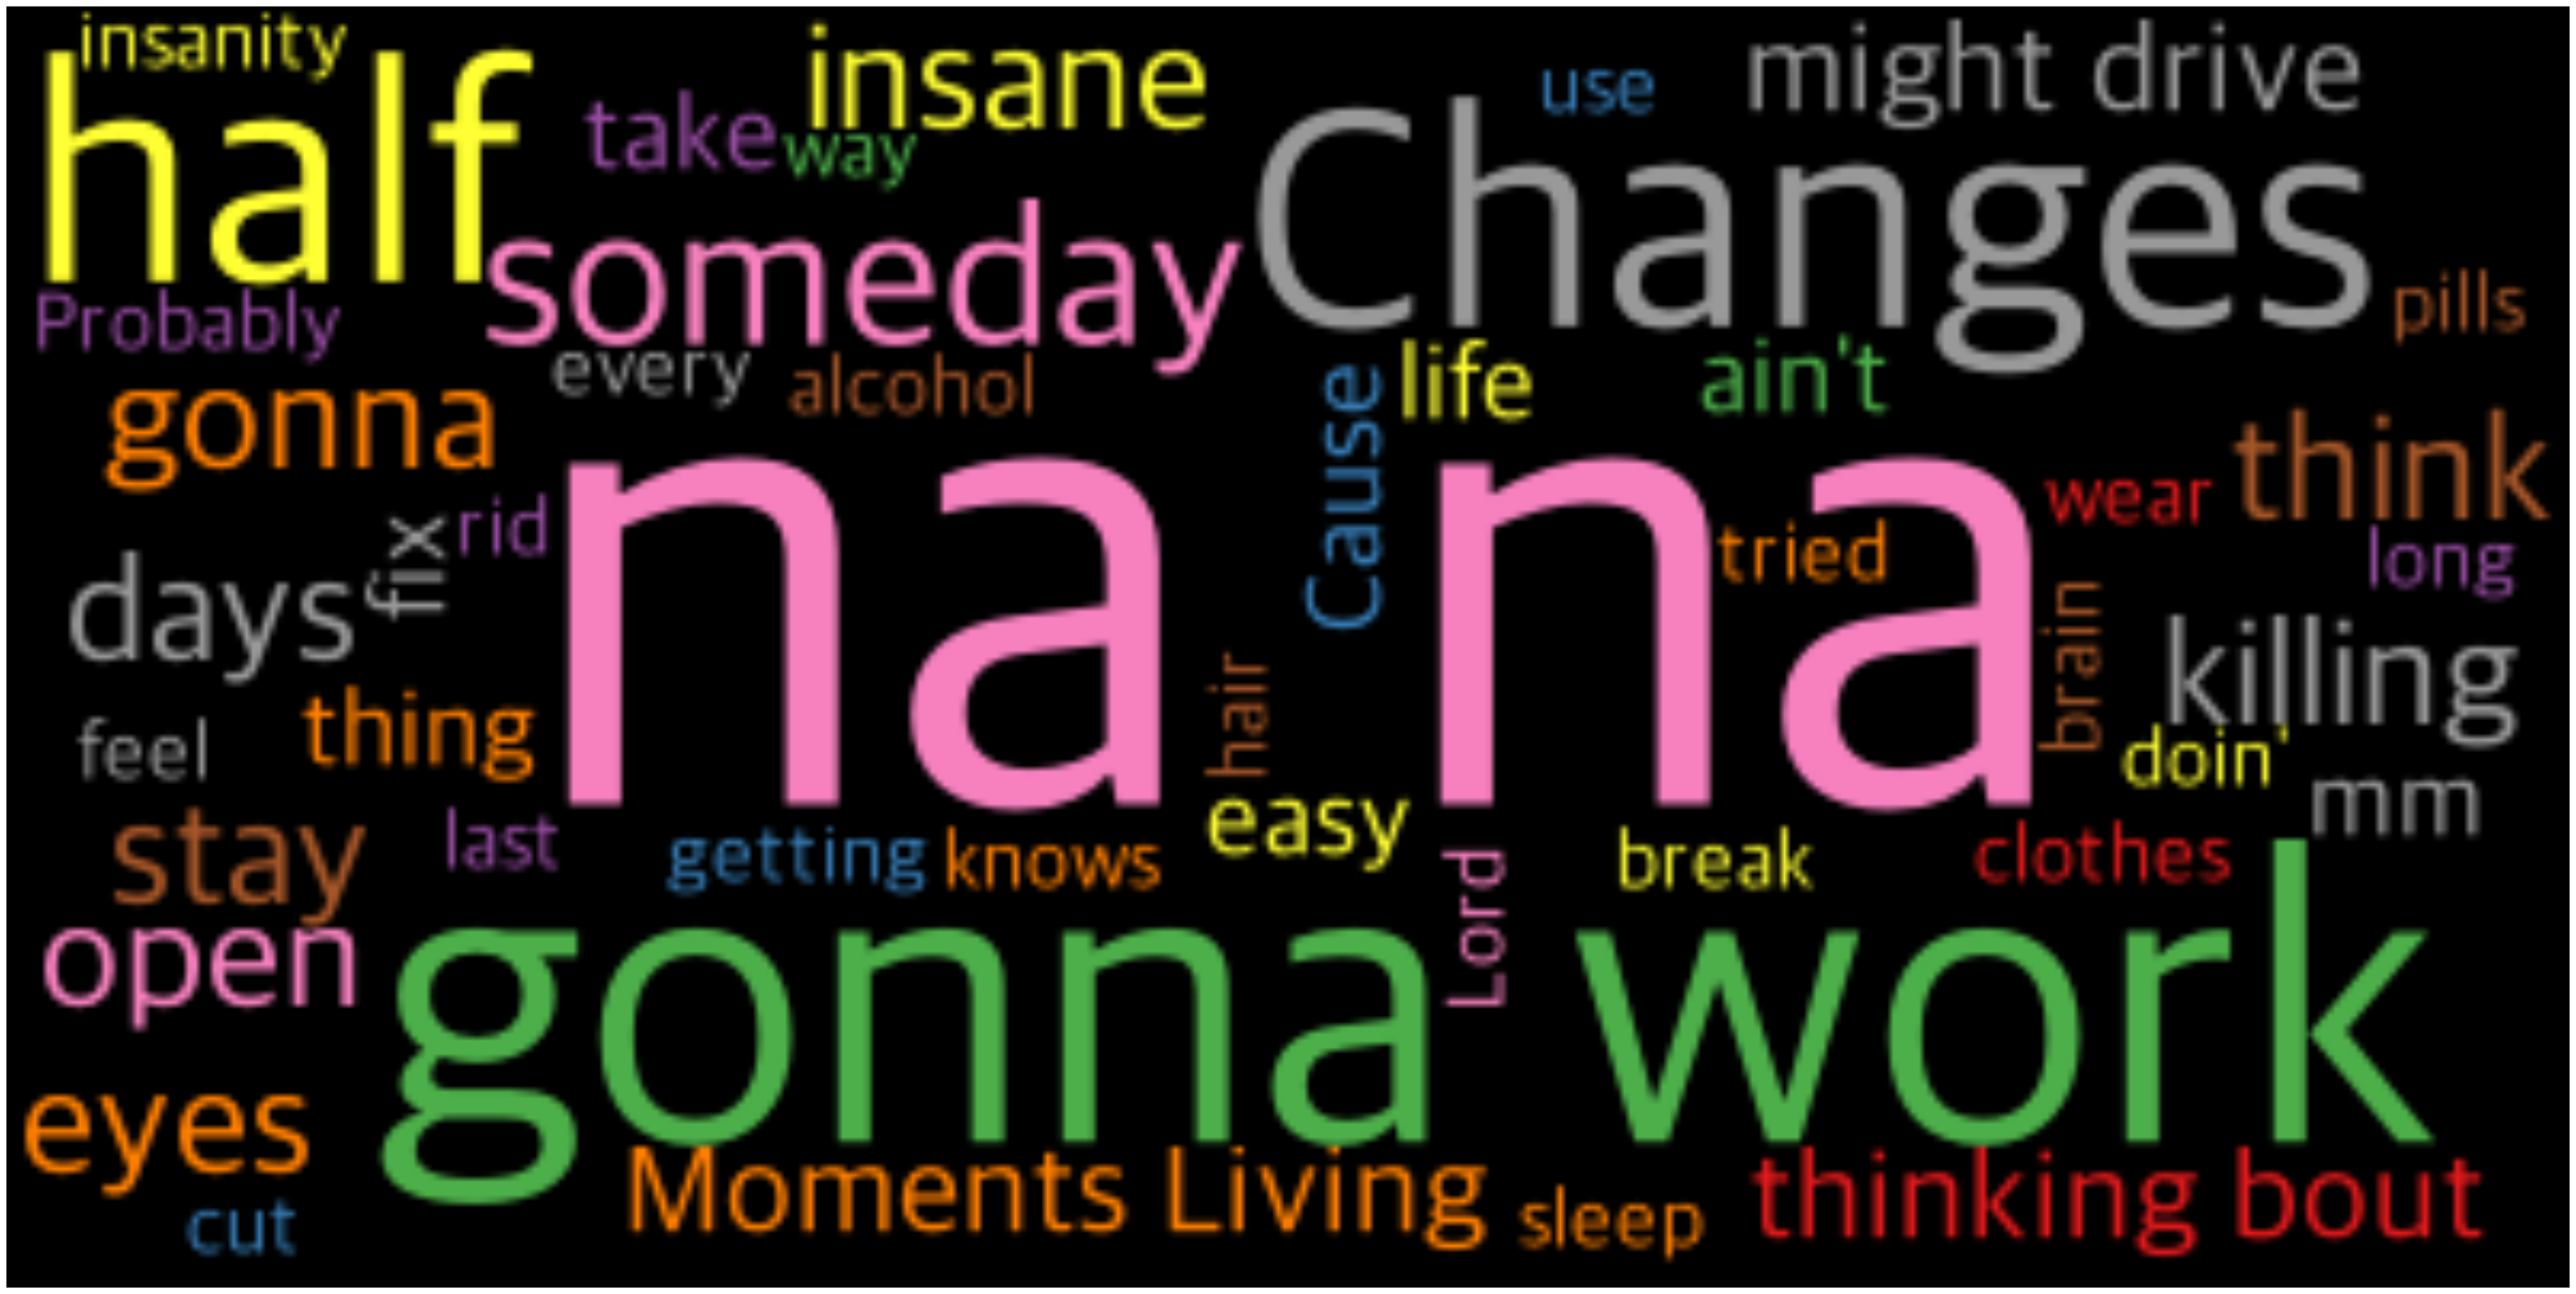

In [29]:
plt.figure(figsize=(50,50))
plt.axis('off')
plt.imshow(wc, interpolation='bilinear')

In [31]:
mask = np.array(Image.open('./data/hexagon.png'))
wc = WordCloud(font_path=font_path, background_color="white", random_state=10, colormap='Set1', mask=mask)
wc.generate(result)

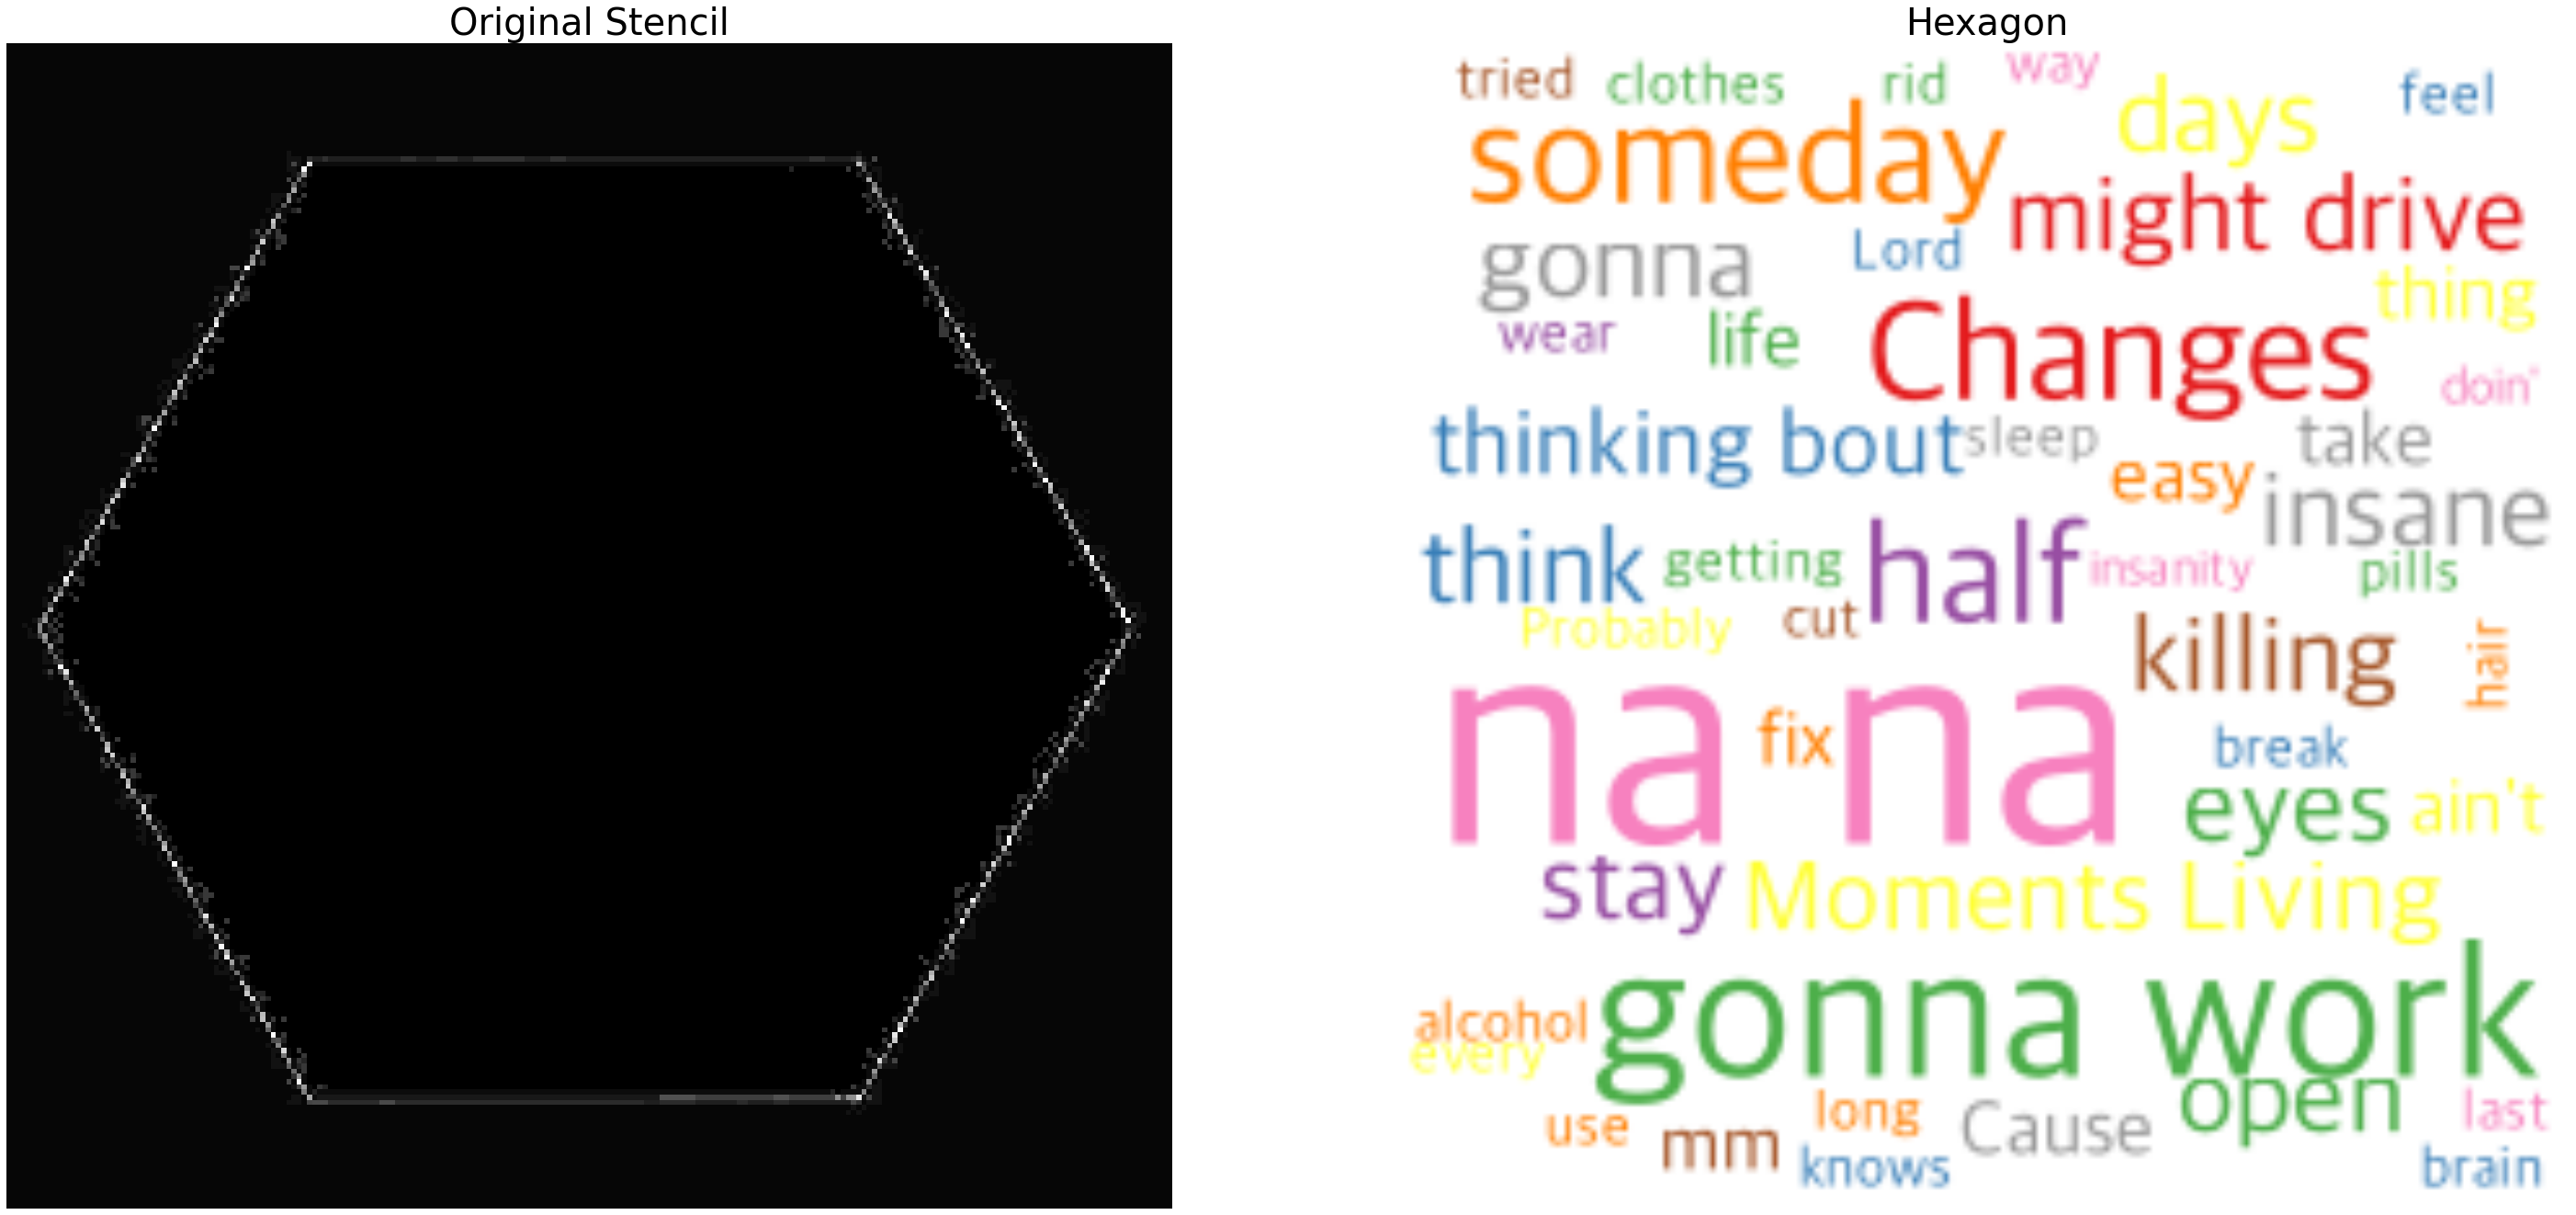

In [34]:
f = plt.figure(figsize=(50,50))
f.add_subplot(1,2, 1)
plt.imshow(mask, cmap=plt.cm.gray)
plt.title('Original Stencil', size=40)
plt.axis("off")
f.add_subplot(1,2, 2)
plt.imshow(wc, interpolation='bilinear')
plt.title('Hexagon', size=40)
plt.axis("off")
plt.show()

In [55]:
completion = pd.read_csv('./data/enrolleds_detail.csv')
completion.tail(5)

,lecture_id,done_date,user_id
8282,5f266927e67b8fcf4340c093,2020-09-03 16:04:05.555000,9839ad64411238ad6664450ba3e6cc2b
8283,5f266927e67b8fcf4340c094,2020-09-03 16:04:10.446000,9839ad64411238ad6664450ba3e6cc2b
8284,5f266927e67b8fcf4340c095,2020-09-03 16:04:14.513000,9839ad64411238ad6664450ba3e6cc2b
8285,5f266927e67b8fcf4340c096,2020-09-03 16:05:21.233000,9839ad64411238ad6664450ba3e6cc2b
8286,5f275350c107da1758c81135,2020-09-03 15:40:49.006000,9839ad64411238ad6664450ba3e6cc2b


In [56]:
days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

In [57]:
format = "%Y-%m-%dT%H:%M:%S.%f"
completion['completion_time'] = pd.to_datetime(completion['done_date'], format=format)
completion.tail(3)

,lecture_id,done_date,user_id,completion_time
8284,5f266927e67b8fcf4340c095,2020-09-03 16:04:14.513000,9839ad64411238ad6664450ba3e6cc2b,2020-09-03 16:04:14.513
8285,5f266927e67b8fcf4340c096,2020-09-03 16:05:21.233000,9839ad64411238ad6664450ba3e6cc2b,2020-09-03 16:05:21.233
8286,5f275350c107da1758c81135,2020-09-03 15:40:49.006000,9839ad64411238ad6664450ba3e6cc2b,2020-09-03 15:40:49.006


In [60]:
completion['day'] = completion['completion_time'].dt.day_name().astype(str)
completion.tail(3)

,lecture_id,done_date,user_id,completion_time,day,hour
8284,5f266927e67b8fcf4340c095,2020-09-03 16:04:14.513000,9839ad64411238ad6664450ba3e6cc2b,2020-09-03 16:04:14.513,Thursday,16
8285,5f266927e67b8fcf4340c096,2020-09-03 16:05:21.233000,9839ad64411238ad6664450ba3e6cc2b,2020-09-03 16:05:21.233,Thursday,16
8286,5f275350c107da1758c81135,2020-09-03 15:40:49.006000,9839ad64411238ad6664450ba3e6cc2b,2020-09-03 15:40:49.006,Thursday,15


In [61]:
completion['hour'] = completion['completion_time'].dt.hour.astype(int)
completion.tail(3)

,lecture_id,done_date,user_id,completion_time,day,hour
8284,5f266927e67b8fcf4340c095,2020-09-03 16:04:14.513000,9839ad64411238ad6664450ba3e6cc2b,2020-09-03 16:04:14.513,Thursday,16
8285,5f266927e67b8fcf4340c096,2020-09-03 16:05:21.233000,9839ad64411238ad6664450ba3e6cc2b,2020-09-03 16:05:21.233,Thursday,16
8286,5f275350c107da1758c81135,2020-09-03 15:40:49.006000,9839ad64411238ad6664450ba3e6cc2b,2020-09-03 15:40:49.006,Thursday,15


In [64]:
monday = completion[completion['day'] == "Monday"]
wednesday = completion[completion['day'] == "Wednesday"]
monday.head(3)

,lecture_id,done_date,user_id,completion_time,day,hour
11,5f266927e67b8fcf4340c090,2020-08-10 11:35:11.690000,3614f59da8a89ab0e92e9e5b44b3de9e,2020-08-10 11:35:11.690,Monday,11
12,5f266927e67b8fcf4340c091,2020-08-10 11:48:41.552000,3614f59da8a89ab0e92e9e5b44b3de9e,2020-08-10 11:48:41.552,Monday,11
13,5f266927e67b8fcf4340c092,2020-08-10 16:03:40.831000,3614f59da8a89ab0e92e9e5b44b3de9e,2020-08-10 16:03:40.831,Monday,16


In [66]:
wednesday.head(3)

,lecture_id,done_date,user_id,completion_time,day,hour
1,5f266927e67b8fcf4340c088,2020-09-02 14:44:24.450000,4b7059a5ac55da515ec9bd77c7ceaaff,2020-09-02 14:44:24.450,Wednesday,14
59,5f266927e67b8fcf4340c090,2020-08-05 01:12:44.962000,b7d0953832ad73adf2fe1a1ab0e0d612,2020-08-05 01:12:44.962,Wednesday,1
77,5f266927e67b8fcf4340c092,2020-08-12 15:04:41.747000,fe18614adc6fa916154da3b419b23afe,2020-08-12 15:04:41.747,Wednesday,15


In [69]:
monday_hour_count = monday.groupby('hour')['user_id'].count()
wednesday_hour_count = wednesday.groupby('hour')['user_id'].count()
monday_hour_count.head(2)

hour
0    79
1    31
Name: user_id, dtype: int64

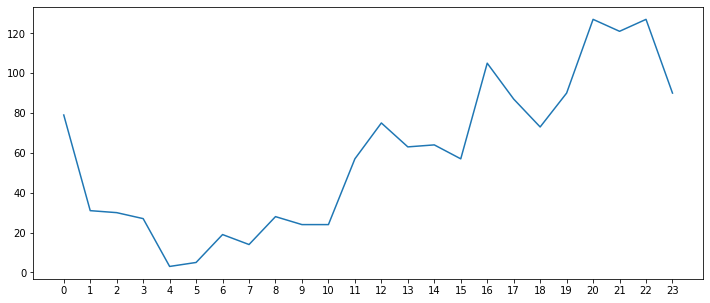

In [71]:
plt.figure(figsize=(12,5))
plt.plot(monday_hour_count.index, monday_hour_count)
plt.xticks(np.arange(24))
plt.show()

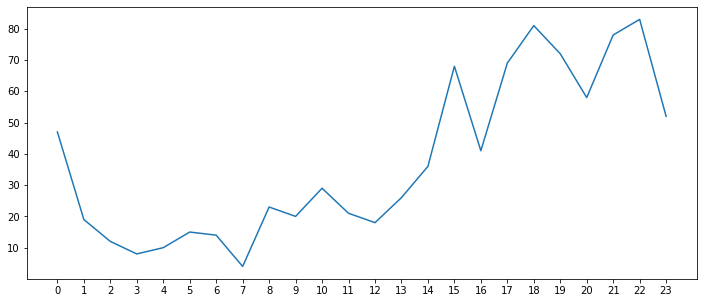

In [72]:
plt.figure(figsize=(12,5))
plt.plot(wednesday_hour_count.index, wednesday_hour_count)
plt.xticks(np.arange(24))
plt.show()

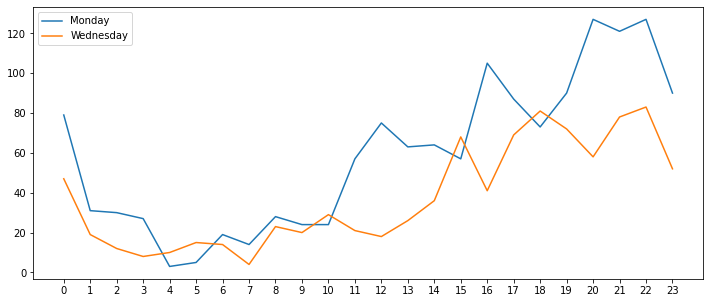

In [82]:
plt.figure(figsize=(12,5))
plt.plot(monday_hour_count.index, monday_hour_count)
plt.plot(wednesday_hour_count.index, wednesday_hour_count)
plt.xticks(np.arange(24))
plt.legend(['Monday', 'Wednesday'])
plt.show()